## Pandas y Valores faltantes
### Análisis del dataset Titanic
#### Breve explicación del dataset
`The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considerly "unsinkable" RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren´t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passangers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: 
"what sorts of people were more likely to survive?" 
Using passenger data (ie name, age, gender, socio-economic class, etc)`

In [168]:
import pandas as pd
import numpy as np

In [37]:
'''Importamos los 3 archivos'''
titanic_gender = pd.read_csv(r'C:\Users\Alfredo\Bitácoras\SoyHenry\DS-M1\Clase 04\gender_submission (1).csv', sep = ',')
titanic_test = pd.read_csv(r'C:\Users\Alfredo\Bitácoras\SoyHenry\DS-M1\Clase 04\test (1).csv', sep = ',')
titanic_train = pd.read_csv(r'C:\Users\Alfredo\Bitácoras\SoyHenry\DS-M1\Clase 04\train (1).csv', sep = ',')

In [43]:
'''El dataset gender, es un set de predicciones que supone o asume que todos los sobrevivientes son
mujeres, como un ejemplo de como un archivo subido, debería verse.
Es decir que una vez que hayamos terminado toda nuestra investigación y armado de modelo, el archivo final
debería verse de una manera similar. Indicando con un 1 al sobreviviente y con un 0 al fallecido.'''
print(titanic_gender.shape)
titanic_gender.head(3)

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [44]:
'''El conjunto de test debe usarse para ver que tan bien se desempeña el modelo en datos no vistos.
Para el conjunto de test ó prueba, no proporcionamos la verdad en tierra para cada pasajero. Es nuestro
trabajo predecir estos resultados. Para cada pasajero en el conjunto de test ó prueba, hay que usar el 
modelo que entrenamos para predecir si sobrevivieron o no al hundimiento del Titanic.'''
print(titanic_test.shape)
titanic_test.head(3)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [45]:
'''El conjunto de train, debe usarse para construir nuestros modelos de aprendizaje automático. Para el 
conjunto de entrenamiento, proporcionamos el resultado de "verdad sobre tierra" para cada pasajero.
Su modelo se basará en características como el género y la clase de los pasajeros. También se puede
utilizar la ingeniería de features para crear nuevas features (o características)'''
print(titanic_train.shape)
titanic_train.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Exploring the Titanic Dataset (EDA)

In [22]:
import seaborn as sns
import missingno as msno
sns.set(style = 'ticks')

In [21]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

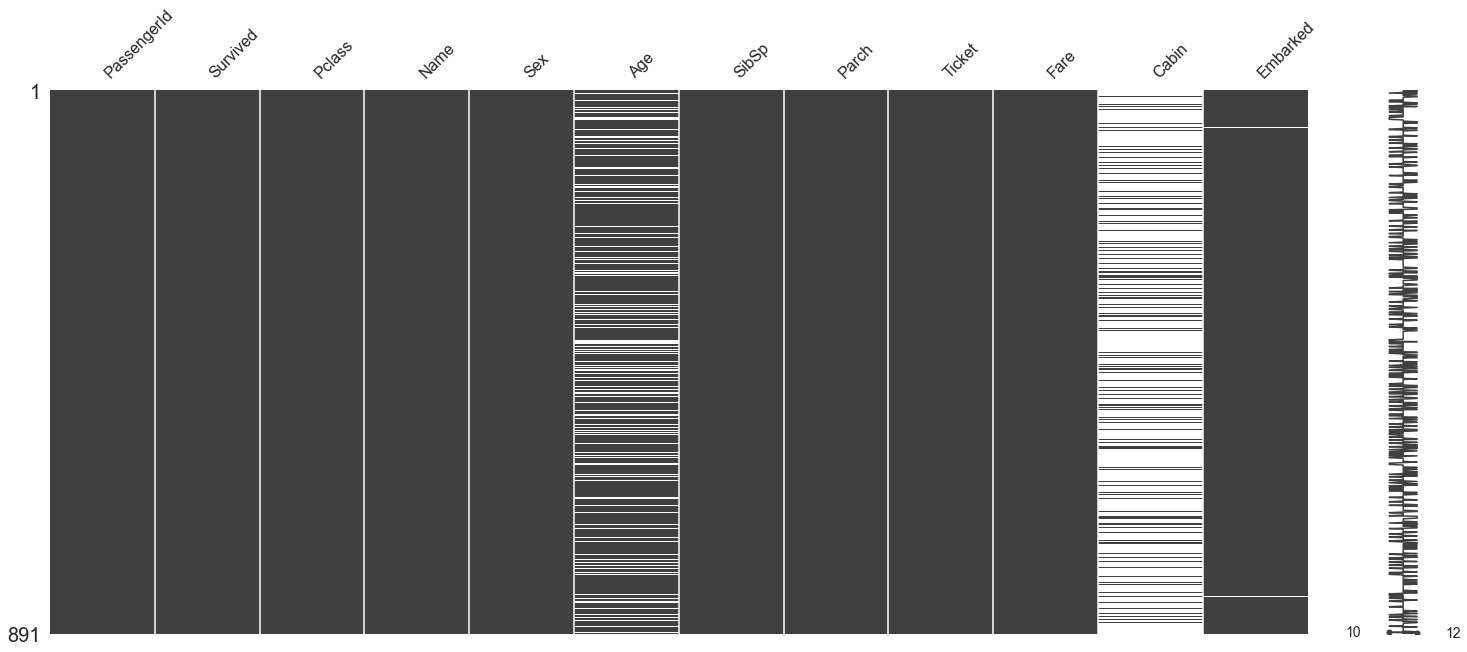

In [23]:
'''Vamos a ver la distribución de los valores faltantes.
Notamos que hay 3 columnas con valores faltantes. "Age", "Cabin", "Embarked" '''
msno.matrix(titanic_train)

In [28]:
'''Definir valores perdidos. 
Como primer paso vamos a detectar el recuento / porcentaje de valores perdidos en cada columna del
conjunto de datos. Esto nos va a dar una idea de la ditribución de los valores perdidos.'''

def missing_values_table(df):
    '''Total de valores perdidos'''
    mis_val = df.isnull().sum()
    
    '''Porcentaje de valores perdidos'''
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    '''Hacemos una tabla con los resultados'''
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    '''Renombramos las columnas'''
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Valores Faltantes', 1:
                                                               '% de Valores Totales'})
    '''Ordenamos la tabla por el porcentaje en orden descendente'''
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% de Valores Totales',
                                                             ascending = False).round(1)
    
    '''Imprimir el resumen de la información'''
    print('El dataframe seleccionado tiene '+ str(df.shape[1]) + ' columnas.\n'
         'Hay ' + str(mis_val_table_ren_columns.shape[0]) + 
         ' columnas que tienen valores faltantes.')
    
    '''Devuelve el dataframe con informacion faltante'''
    return mis_val_table_ren_columns

In [62]:
train_missing = missing_values_table(titanic_train)
print('\nValores faltantes del dataset titanic_train:')
train_missing

El dataframe seleccionado tiene 12 columnas.
Hay 3 columnas que tienen valores faltantes.

Valores faltantes del dataset titanic_train:


,Valores Faltantes,% de Valores Totales
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


<AxesSubplot:>

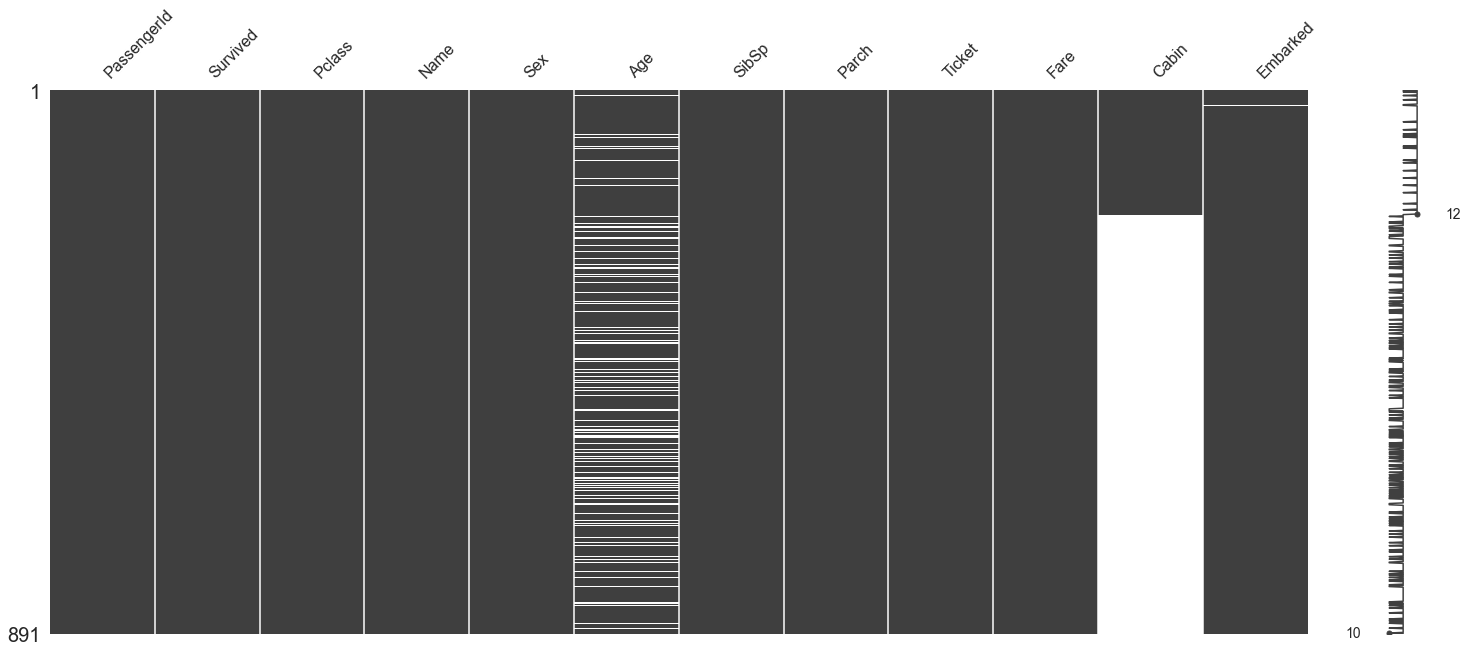

In [32]:
'''Vamos a buscar algún tipo de correlación entre los valores faltantes.
Parece haber un poco de correlación entre los valores faltantes de la cabina, con la edad.
'''
sorted = titanic_train.sort_values('Cabin')
msno.matrix(sorted)

<AxesSubplot:>

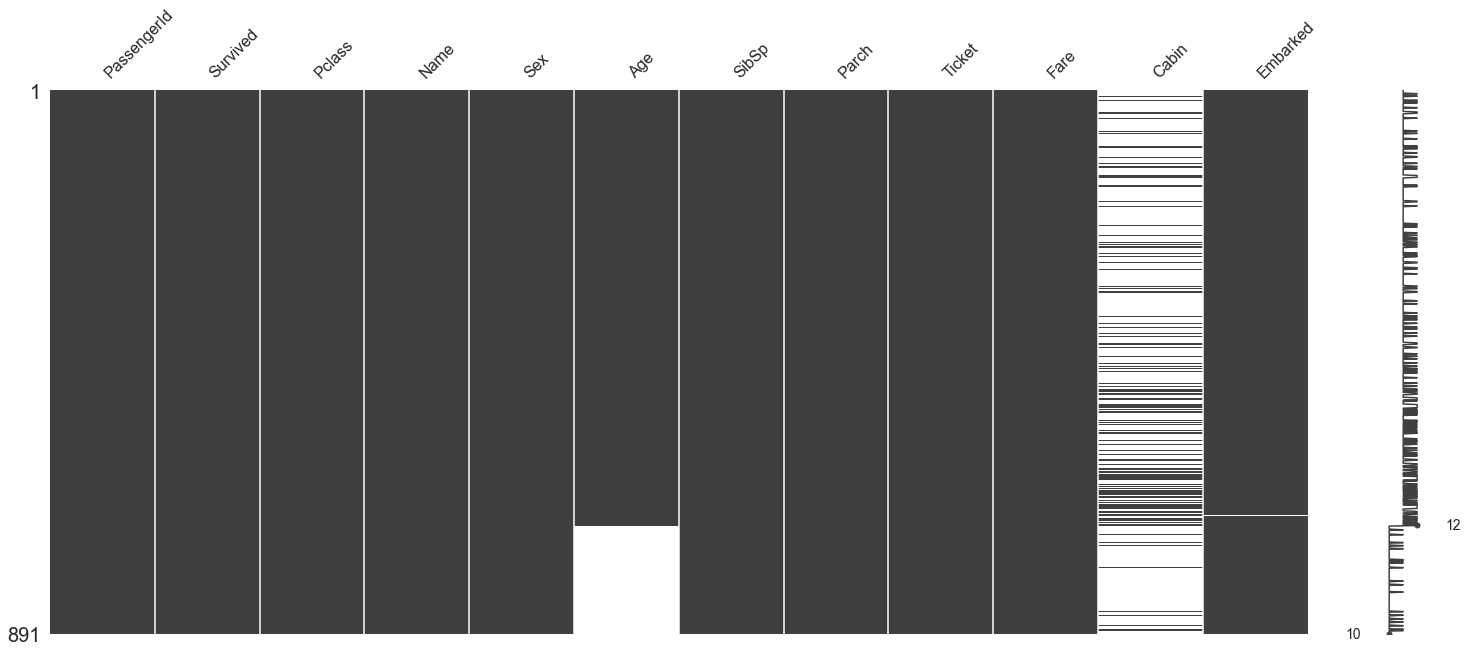

In [33]:
'''Ordenamos ahora por edad, a ver que pasa.'''
sorted = titanic_train.sort_values('Age')
msno.matrix(sorted)
'''Se puede apreciar una gran correlación con los valores faltantes de edad con los valores faltantes de
la cabina.'''

<AxesSubplot:>

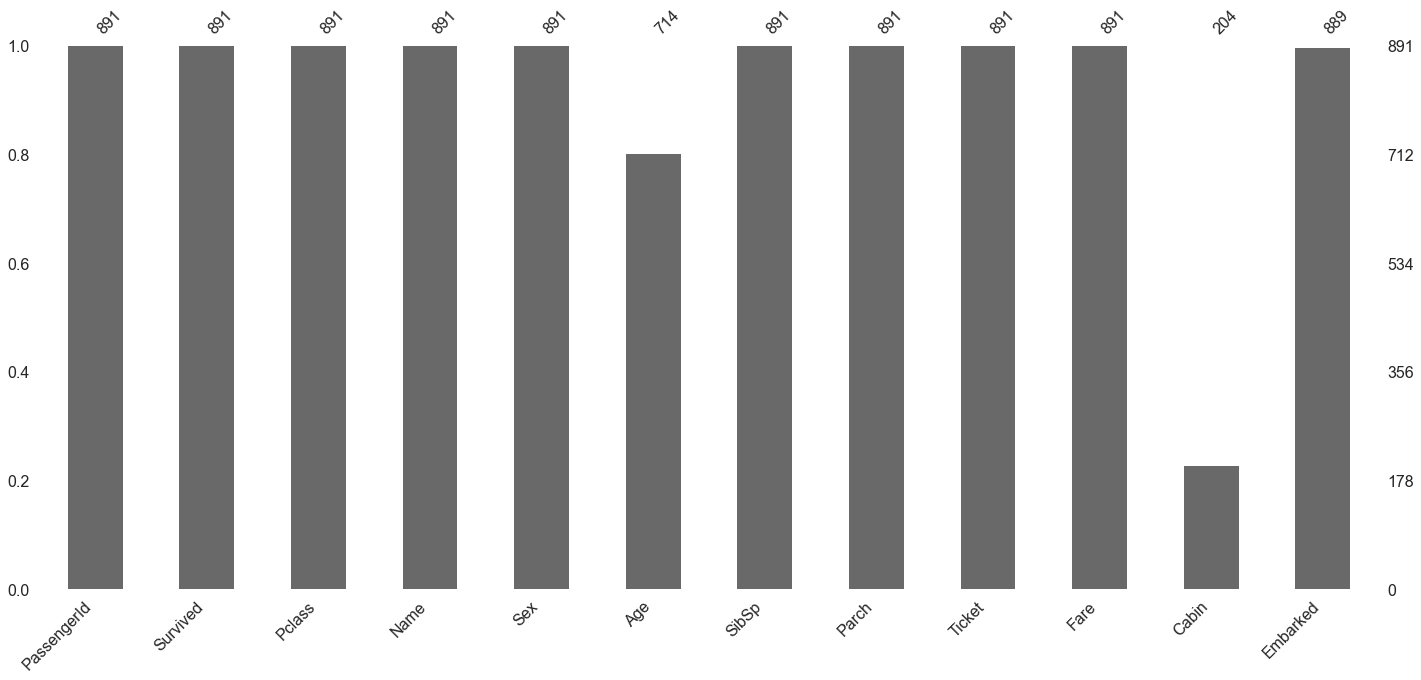

In [34]:
'''Otra manera de ver las columnas con valores faltantes.'''
msno.bar(titanic_train)

<AxesSubplot:>

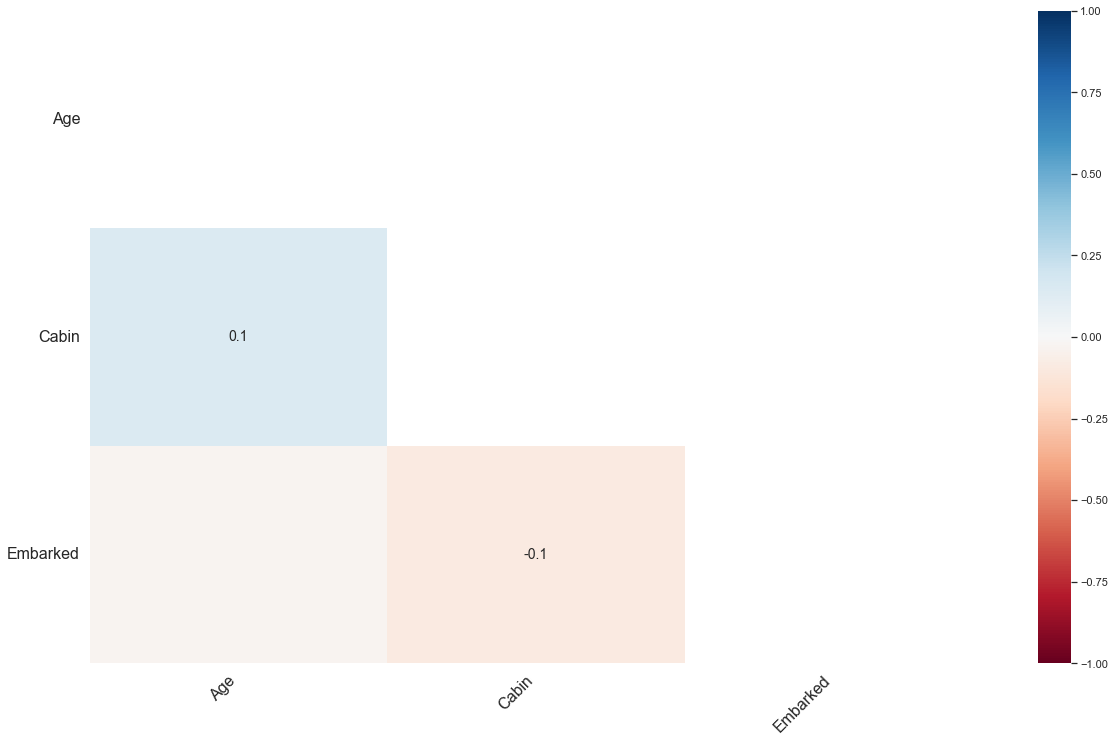

In [35]:
'''Indagando un poco más.
Tratamos de encontrar la razón por la que faltan los datos con un mapa de calor'''
msno.heatmap(titanic_train)
'''Vemos que hay correlación entre cabina y edad.
Es una correlación baja, pero puede ser indicio de algo a la hora de limpiar los valores faltantes.'''

### Tratar los valores perdidos
Después de haber identificado los patrones en los valores perdidos, es importante tratarlos bien.

* Eliminaciones por pares: Borrar solamente los valores que faltan.
* Eliminaciones de filas enteras por lista: Eliminación de la fila que contiene el valor que falta.
* Eliminación de columnas enteras: Eliminación de la columna que contiene el valor que falta.

Eliminar significa eliminar los valores faltantes de un conjunto de datos. Sin embargo, esto no se recomienda ya que podría resultar en la pérdida de información del conjunto de datos. Solo debemos eliminar los valores faltantes de un conjunto de datos si su proporción es muy pequeña.

[Video explicativo bien fácil de las diferencias entre MCAR, MAR y MNAR](https://www.youtube.com/watch?v=YpqUbirqFxQ)

[Abstract Caso hipotético que explica las diferencias entre MCAR, MAR y MNAR con más detalle](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4121561/#:~:text=%27Missing%20completely%20at%20random%27%20means,missing%20and%20observed%20blood%20pressures.)
![Definiciones de MCAR, MNAR y MAR](https://www.researchgate.net/publication/348067403/figure/fig1/AS:1023820194410509@1621109164997/Types-of-missing-data-and-its-description.jpg)

![Imagen de MCAR, MNAR, MAR](https://miro.medium.com/max/1058/1*qE8g5nqa2GNT_2tRFag8aw.jpeg)

**Missing Completly At Random (MCAR):** `The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.`

**Missing At Random (MAR):** `MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.`

**Missing Not At Random (MNAR):** `Missingness depends on unobserved data or the value of the missing data itself.`

[Notebook de como tratar valores faltantes de titanic](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python)

[Como llenar valores faltantes de acuerdo a una condicion](https://stackoverflow.com/questions/10715519/conditionally-fill-column-values-based-on-another-columns-value-in-pandas)

[Guía de como tratar los valores perdidos en Python](https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/#:~:text=The%20possible%20ways%20to%20do,not%20occur%20in%20the%20data.)

[A complete guide to dealing with missing values in Python ---> muy parecido al anterior](https://www.analyticsvidhya.com/blog/2021/10/a-complete-guide-to-dealing-with-missing-values-in-python/)

<AxesSubplot:>

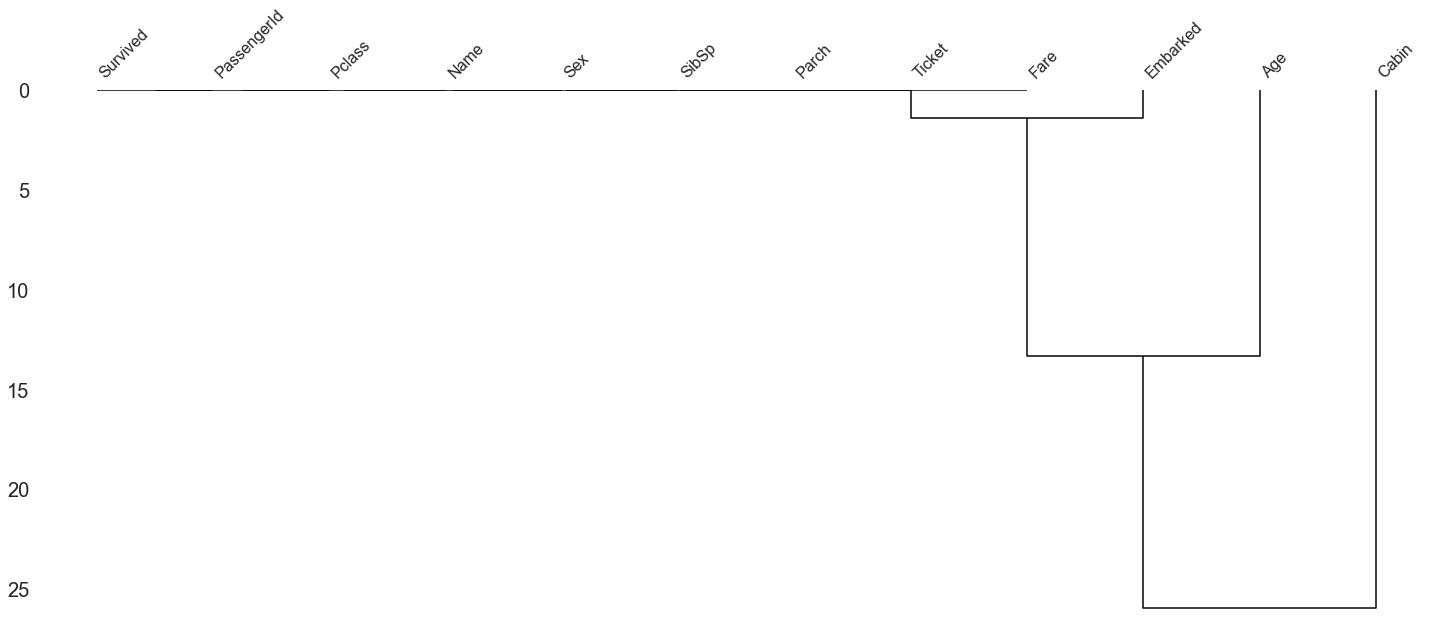

In [60]:
'''Buscando una razón para los valores faltantes usando Dendogramas'''
msno.dendrogram(titanic_train)

#### Leamos el dendrograma anterior desde una perspectiva descendente:

Las hojas de los clusters que se enlazan a una distancia de cero predicen completamente la presencia de una variable cuando otra está llena, o ambas pueden estar siempre llenas o ambas vacías, y así sucesivamente.


La falta de datos de Embarked tiende a ser más similar a la de Age que a la de Cabin, etc. Sin embargo, en este caso concreto, la correlación es alta, ya que la columna Embarked tiene muy pocos valores perdidos.

Este conjunto de datos no tiene muchos valores perdidos, pero si se utiliza la misma metodología en conjuntos de datos con muchos valores perdidos, surgirá definitivamente algún patrón interesante.

![Deletions](https://imgur.com/tBvdfyX.png)

In [63]:
train = titanic_train.copy()
train['Age'].mean()

29.69911764705882

In [65]:
'''Eliminar filas que cont, tienen algun NaN o algun faltante para la columna Age'''
train.dropna(subset = ['Age'], how = 'any', inplace = True)
train['Age'].isnull().sum()

0

In [66]:
train['Age'].mean()

29.69911764705882

![Imputations](https://imgur.com/bL0iHde.png)

#### Técnicas básicas de imputación
`* Imputación con un valor constante.`

`* Imputación usando medidas estadísticas (media, mediana, moda) de cada columna en la que hay valores faltantes.
Para estas, deberíamos usar el "SimpleImputer" class de Sklearn`


In [106]:
from sklearn.impute import SimpleImputer
train_constant = titanic_train.copy()
mean_imputer = SimpleImputer(strategy = 'constant') # imputing using constant value
'''Se usa la constante como imputer'''
train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)
train_constant.isnull().sum()
'''Lo malo de este método es que a los NaN, los reemplaza por el string "missing value" lo que nos impide
hacer calculos en el medio, porque tenemos un tipo de dato nuevo en el medio (en este caso string)'''

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [112]:
train_constant.mean() '''No nos aparece la media de age'''

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [122]:
'''Porqué nos tira error?'''
print(train_constant['Age'].mean())

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [123]:
print(train_constant['Age'])
'''Lo malo de este método es que a los NaN, los reemplaza por el string "missing value" lo que nos impide
hacer calculos en el medio, porque tenemos un tipo de dato nuevo en el medio (en este caso string)'''

0               22.0
1               38.0
2               26.0
3               35.0
4               35.0
           ...      
886             27.0
887             19.0
888    missing_value
889             26.0
890             32.0
Name: Age, Length: 891, dtype: object


'Lo malo de este método es que a los NaN, los reemplaza por el string "missing value" lo que nos impide\nhacer calculos en el medio, porque tenemos un tipo de dato nuevo en el medio (en este caso string)'

In [71]:
from sklearn.impute import SimpleImputer
train_most_frequent = titanic_train.copy()
''' Se usa 'mean' como estrategia'''
mean_imputer = SimpleImputer(strategy = 'most_frequent') # strategy can also be mean or median
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)

In [72]:
train_most_frequent.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [89]:
train_most_frequent['Age'].mean()

28.566969696969696

#### Advanced Imputation Techniques

La clase KNNImputer proporciona la imputación para rellenar los valores que faltan utilizando el enfoque de k-Nearest Neighbors.Cada característica que falta se imputa utilizando los valores de n_neighbors vecinos más cercanos que tienen un valor para la característica. La característica de los vecinos se promedia uniformemente o se pondera por la distancia a cada vecino.

In [133]:
train_knn = titanic_train.copy(deep=True)
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors = 2, weights = 'uniform')
train_knn['Age'] = knn_imputer.fit_transform(train_knn[['Age']])
print('Valores nulos en Age:',train_knn['Age'].isnull().sum())
train_knn['Age']

Valores nulos en Age: 0


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

#### Imputación de características multivariantes
Imputación multivariante por ecuaciones encadenadas (MICE).

Estrategia de imputación de valores perdidos que consiste en modelar cada característica con valores perdidos en función de otras características de forma rotatoria. Realiza múltiples regresiones sobre una muestra aleatoria de datos, luego toma el promedio de los valores de la regresión múltiple y utiliza ese valor para imputar el valor faltante. En sklearn, se implementa como sigue:

In [135]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = titanic_train.copy(deep = True)
mice_imputer = IterativeImputer()
train_mice['Age'] = mice_imputer.fit_transform(train_mice[['Age']])
print(train_mice['Age'].isnull().sum())
train_mice['Age']

0


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [144]:
print('Dataset titanic_train:')
print(titanic_train.Age.mean())
print(titanic_train.Age.mode()[0])
print(titanic_train.Age.median())
print(titanic_train.Age.std())
print('\nDataset train_constant:')
print('La media en este no se puede')
print('La moda en este no se puede')
print('La mediana en este no se puede')
print('No se puede calcular el desvío estándar de este data set')
print('\nDataset train_most_frequent (Simple Imputer):')
print(train_most_frequent.Age.mean())
print(train_most_frequent.Age.mode()[0])
print(train_most_frequent.Age.median())
print(train_most_frequent.Age.std())
print('\nDataset train_knn (vecinos cercanos):')
print(train_knn.Age.mean())
print(train_knn.Age.mode()[0])
print(train_knn.Age.median())
print(train_knn.Age.std())
print('\nDataset train_mice (Imputación de características multivariantes):')
print(train_mice.Age.mean())
print(train_mice.Age.mode()[0])
print(train_mice.Age.median())
print(train_mice.Age.std())

Dataset titanic_train:
29.69911764705882
24.0
28.0
14.526497332334042

Dataset train_constant:
La media en este no se puede
La moda en este no se puede
La mediana en este no se puede
No se puede calcular el desvío estándar de este data set

Dataset train_most_frequent (Simple Imputer):
28.566969696969696
24.0
24.0
13.19957176774647

Dataset train_knn (vecinos cercanos):
29.69911764705882
29.69911764705882
29.69911764705882
13.002015226002882

Dataset train_mice (Imputación de características multivariantes):
29.69911764705882
29.69911764705882
29.69911764705882
13.002015226002882


In [57]:
'''Examinando la columna target
Para cada pasajero del conjunto de test, necesitamos crear un modelo que prediga si los pasajeros
sobrevivieron o no al hundimiento del titanic.
Por lo tanto, "Survived" es la columna target del conjunto de datos. Examinemos la distribución de
la columna target.'''
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

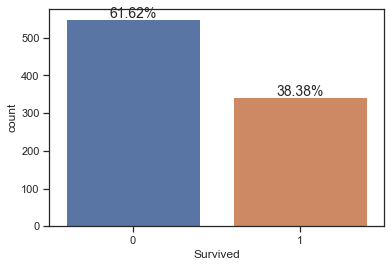

In [58]:
'''En donde "0" es no sobreviviente y "1" es sobreviviente'''
s = sns.countplot(x = 'Survived',data = train_most_frequent)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=14) 

(array([ 71., 425., 245., 100.,  43.,   7.]),
 array([ 0.42      , 13.68333333, 26.94666667, 40.21      , 53.47333333,
        66.73666667, 80.        ]),
 <BarContainer object of 6 artists>)

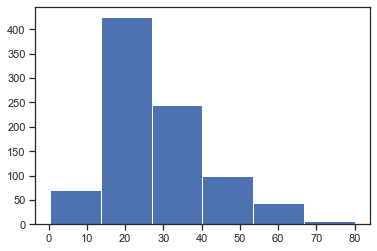

In [146]:
import matplotlib.pyplot as plt
plt.hist(train_most_frequent.Age, bins = 6)

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


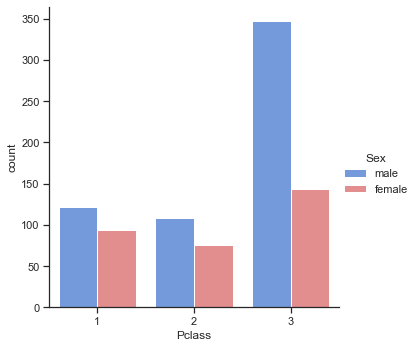

In [154]:
pal = dict(man="#209AE7", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")
sns.catplot("Pclass", data=train_most_frequent, hue="Sex", palette=pal, kind='count')

In [152]:
train_most_frequent

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [157]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age <= 18:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [169]:
'''Creamos la columna who'''
train_most_frequent["who"] = train_most_frequent[["Age", "Sex"]].apply(woman_child_or_man, axis=1)
train_most_frequent["class"] = train_most_frequent.Pclass.map({1: "First", 2: "Second", 3: "Third" })
train_most_frequent["adult_male"] = train_most_frequent.who == "man"
train_most_frequent["deck"] = train_most_frequent.Cabin.str[0].map(lambda s: np.nan if s == "T" else s)
train_most_frequent["embark_town"] = train_most_frequent.Embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
train_most_frequent["alive"] = train_most_frequent.Survived.map({0: "no", 1: "yes"})
train_most_frequent["alone"] = ~(train_most_frequent.Parch + train_most_frequent.SibSp).astype(bool)
train_most_frequent = train_most_frequent.drop(["Name", "Ticket", "Cabin"], axis=1)

In [165]:
train_most_frequent

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who,class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,man,Third
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,First
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,woman,Third
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,First
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,man,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,man,Second
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,woman,First
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S,woman,Third
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,man,First


C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


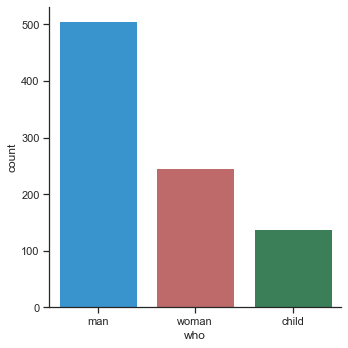

In [160]:
sns.catplot("who", data=train_most_frequent, palette=pal, kind='count');

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


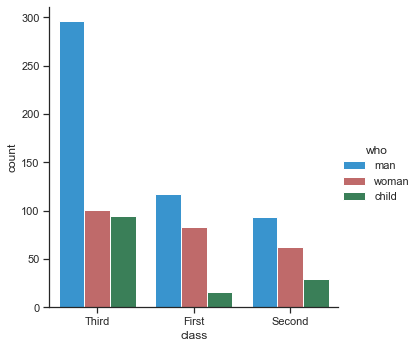

In [166]:
sns.catplot("class", data=train_most_frequent, hue="who", palette=pal, kind='count');

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


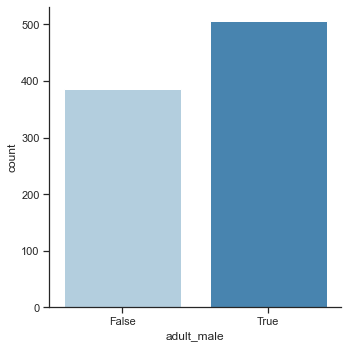

In [171]:
sns.catplot("adult_male", data=train_most_frequent, palette="Blues", kind='count');

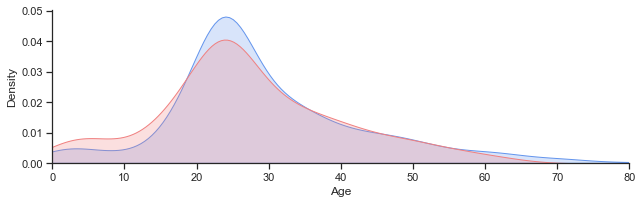

In [174]:
'''Distribuciones de edades'''
fg = sns.FacetGrid(train_most_frequent, hue="Sex", aspect=3, palette=pal)
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0, 80));

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

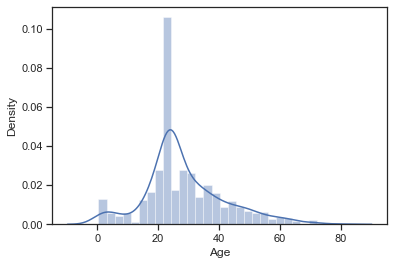

In [176]:
sns.distplot(train_most_frequent.Age)
'''Ahí vemos un outlier que son los 26.91 años de promedio que imputamos, vemos que en relación a la
distribución no fué la mejor idea.'''

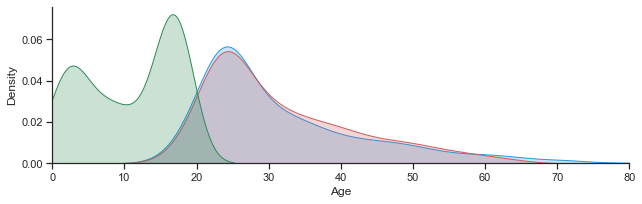

In [178]:
'''Distribución de edades con respecto al género'''
fg = sns.FacetGrid(train_most_frequent, hue="who", aspect=3, palette=pal)
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0, 80));

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


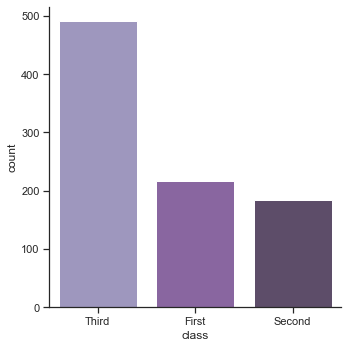

In [180]:
'''Cuántos pasajeros hay en primera, en segunda y en tercera clase?'''
sns.catplot("class", data=train_most_frequent, palette="BuPu_d", kind='count');

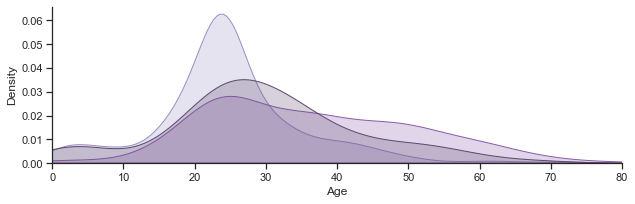

In [181]:
fg = sns.FacetGrid(train_most_frequent, hue="class", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0, 80));

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


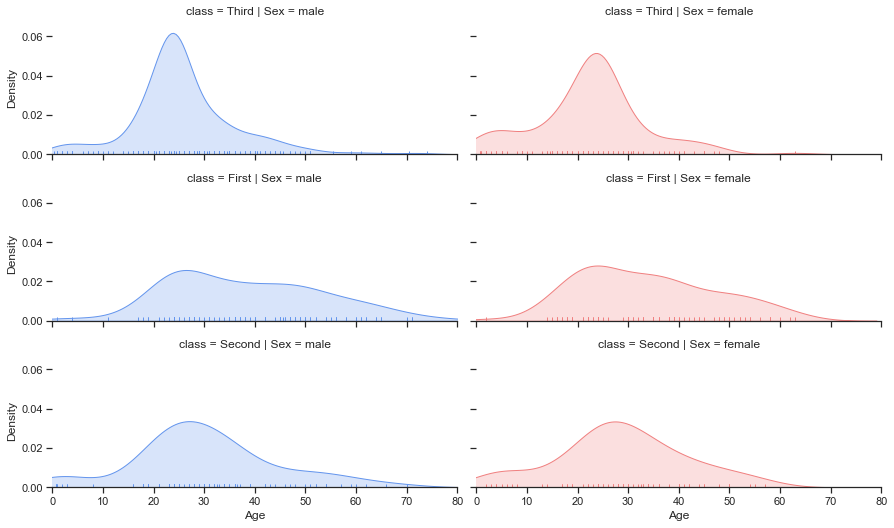

In [182]:
fg = sns.FacetGrid(train_most_frequent, col="Sex", row="class", hue="Sex", size=2.5, aspect=2.5, palette=pal)
fg.map(sns.kdeplot, "Age", shade=True)
fg.map(sns.rugplot, "Age")
sns.despine(left=True)
fg.set(xlim=(0, 80));

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


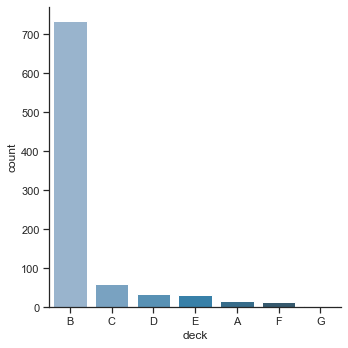

In [186]:
'''Donde están ubicados nuestros pasajeros?'''
sns.catplot("deck", data=train_most_frequent, palette="PuBu_d", kind='count',
               order = train_most_frequent['deck'].value_counts().index);

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


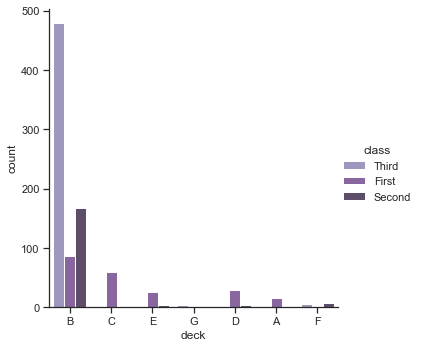

In [188]:
sns.catplot("deck", hue="class", data=train_most_frequent, palette="BuPu_d",kind='count');

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


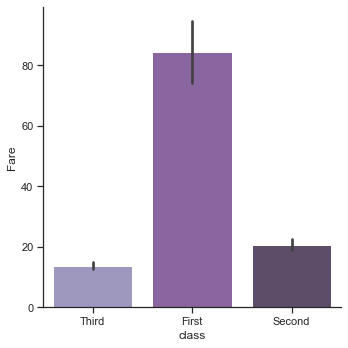

In [195]:
'''Cuánto se pagó por los tickets?'''
sns.catplot("class", "Fare", data=train_most_frequent, palette="BuPu_d", kind='bar');

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare', ylabel='class'>

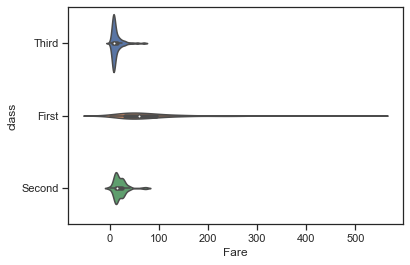

In [198]:
sns.violinplot(train_most_frequent['Fare'], train_most_frequent['class'])

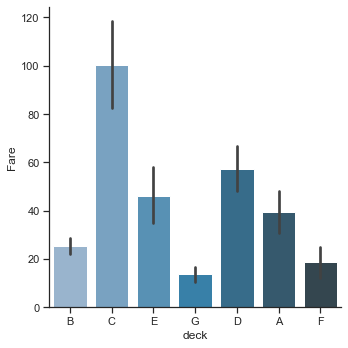

In [200]:
sns.catplot("deck", "Fare", data=train_most_frequent, palette="PuBu_d", kind='bar');

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


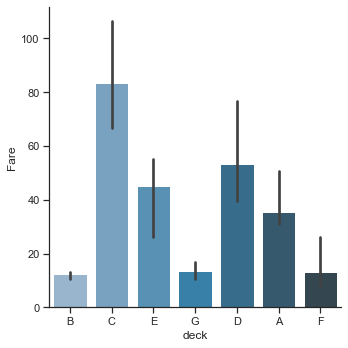

In [201]:
sns.catplot("deck", "Fare", data=train_most_frequent, palette="PuBu_d", estimator=np.median, kind='bar');

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


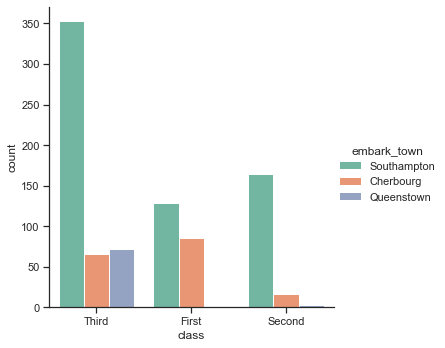

In [205]:
'''De donde vienen los pasajeros?'''
sns.catplot("class", data=train_most_frequent, hue="embark_town", palette="Set2", kind='count');

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


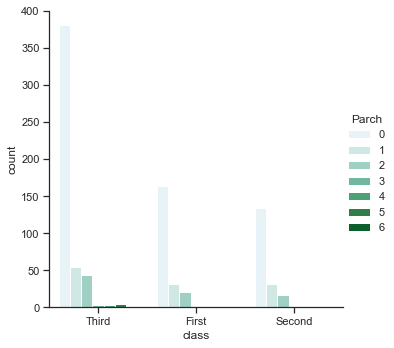

In [206]:
'''Quienes / Cuantos están viajando con miembros de su familia?'''
sns.catplot("class", data=train_most_frequent, hue="Parch", palette="BuGn", kind='count');

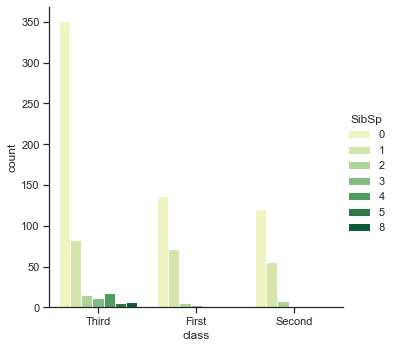

In [209]:
sns.catplot("class", data=train_most_frequent, hue="SibSp", palette="YlGn",  kind='count');

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


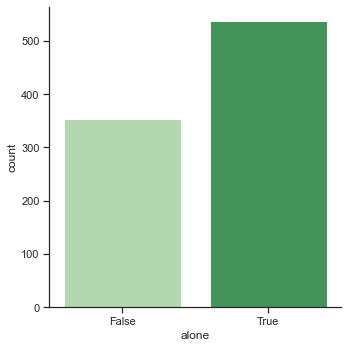

In [210]:
sns.catplot("alone", data=train_most_frequent, palette="Greens",kind='count');

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


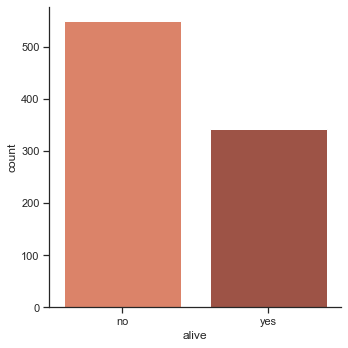

In [211]:
'''Cuantos sobrevivieron?'''
sns.catplot("alive", data=train_most_frequent, palette="OrRd_d", kind='count');

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


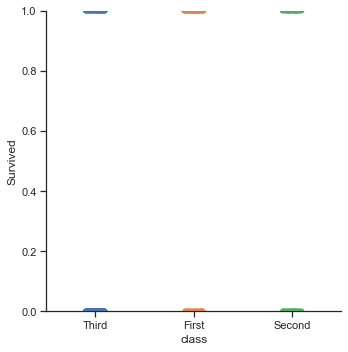

In [215]:
'''En que clase viajaron los sobrevivientes?'''
sns.catplot("class", "Survived", data=train_most_frequent).set(ylim=(0, 1))

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


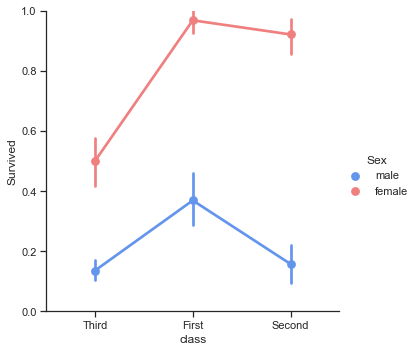

In [219]:
sns.factorplot("class", "Survived", data=train_most_frequent, hue="Sex", palette=pal).set(ylim=(0, 1));

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


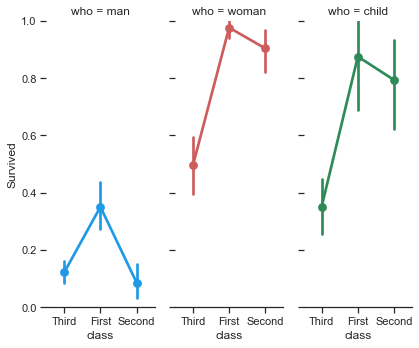

In [223]:
''' Que tanto afecta la frase "Mujeres y niños primero?" '''
fg = sns.factorplot("class", "Survived", data=train_most_frequent, hue="who", col="who", palette=pal, aspect=.4)
fg.set(ylim=(0, 1))
fg.despine(left=True)

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


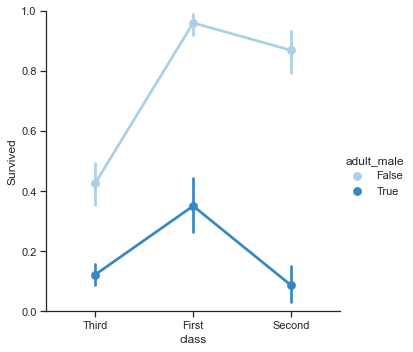

In [224]:
sns.factorplot("class", "Survived", data=train_most_frequent, hue="adult_male", palette="Blues").set(ylim=(0, 1))

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


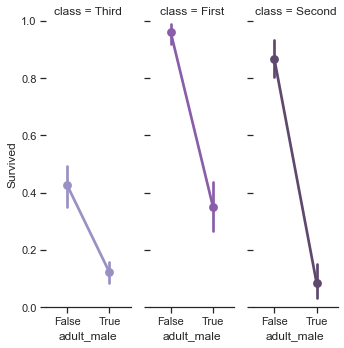

In [234]:
fg = sns.factorplot("adult_male", "Survived", data=train_most_frequent, col="class", hue="class",
                    aspect=.33, palette="BuPu_d")
fg.set(ylim=(0, 1))
fg.despine(left=True);

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


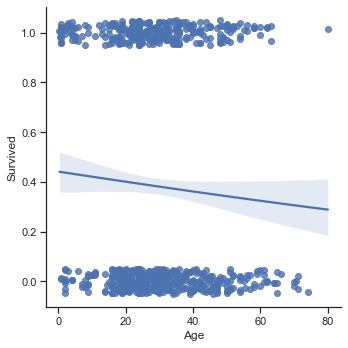

In [229]:
sns.lmplot("Age", "Survived", train_most_frequent, logistic=True, y_jitter=.05);

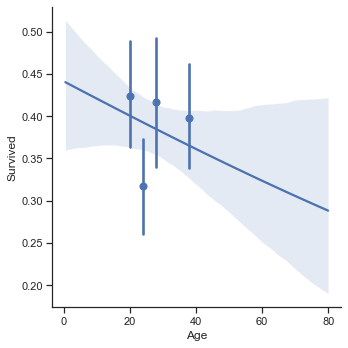

In [231]:
sns.lmplot("Age", "Survived", train_most_frequent, logistic=True, x_bins=4, truncate=True);

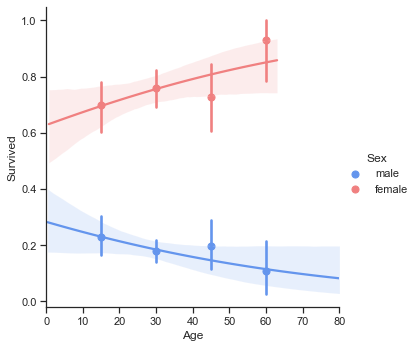

In [233]:
'''Cómo interactua la edad con el sexo y la clase?'''
age_bins = [15, 30, 45, 60]
sns.lmplot("Age", "Survived", train_most_frequent, hue="Sex",
           palette=pal, x_bins=age_bins, logistic=True).set(xlim=(0, 80));

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


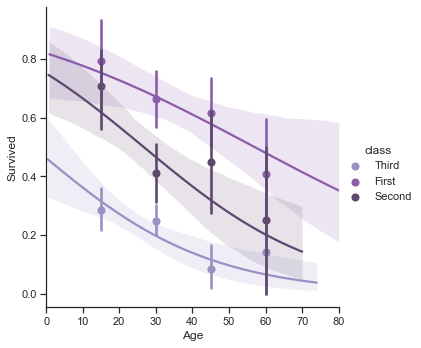

In [237]:
sns.lmplot("Age", "Survived", train_most_frequent, hue="class",
           palette="BuPu_d", x_bins=age_bins, logistic=True).set(xlim=(0, 80));

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


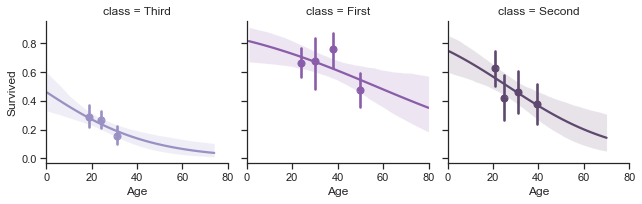

In [238]:
sns.lmplot("Age", "Survived", train_most_frequent, col="class", hue="class",
           palette="BuPu_d", x_bins=4, logistic=True, size=3).set(xlim=(0, 80));

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


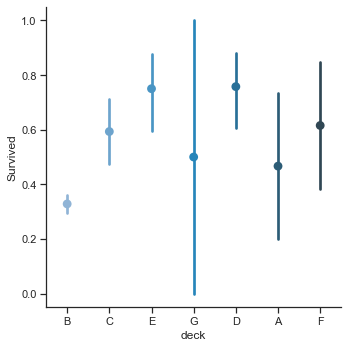

In [239]:
sns.factorplot("deck", "Survived", data=train_most_frequent, palette="PuBu_d", join=False);

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


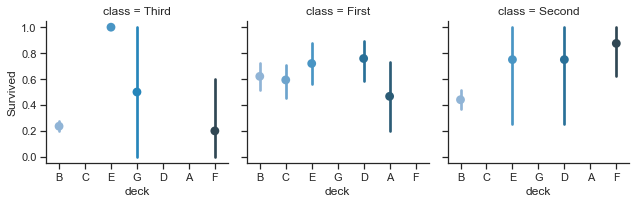

In [240]:
sns.factorplot("deck", "Survived", data=train_most_frequent, col="class", size=3, palette="PuBu_d", join=False);

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


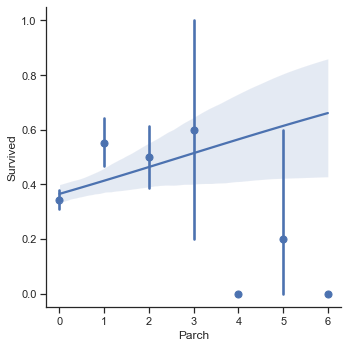

In [242]:
'''Los miembros familiares, incrementaron sus probabilidades de vivir?'''
sns.lmplot("Parch", "Survived", train_most_frequent, x_estimator=np.mean, logistic=True);

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


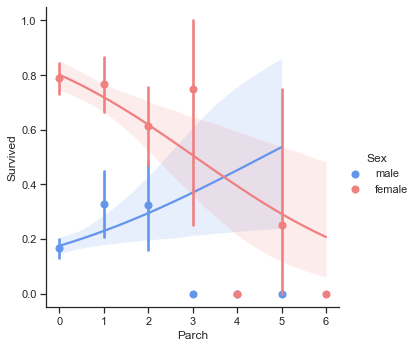

In [243]:
sns.lmplot("Parch", "Survived", train_most_frequent, hue="Sex", x_estimator=np.mean, logistic=True, palette=pal);

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


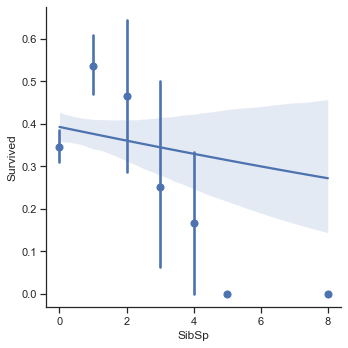

In [244]:
sns.lmplot("SibSp", "Survived", train_most_frequent, x_estimator=np.mean, logistic=True);

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


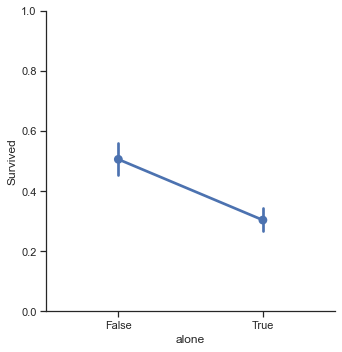

In [245]:
sns.factorplot("alone", "Survived", data=train_most_frequent).set(ylim=(0, 1));

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


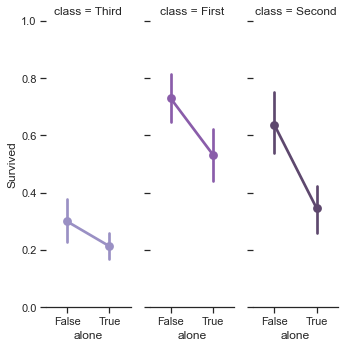

In [246]:
fg = sns.factorplot("alone", "Survived", data=train_most_frequent, col="class", hue="class",
                    aspect=.33, palette="BuPu_d")
fg.set(ylim=(0, 1))
fg.despine(left=True);

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


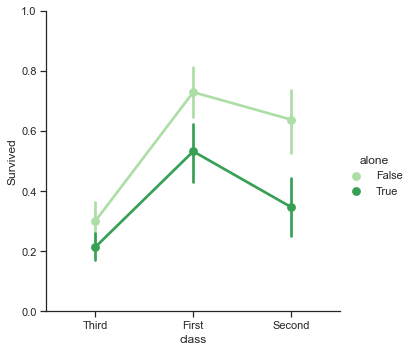

In [247]:
sns.factorplot("class", "Survived", data=train_most_frequent, hue="alone", palette="Greens").set(ylim=(0, 1));

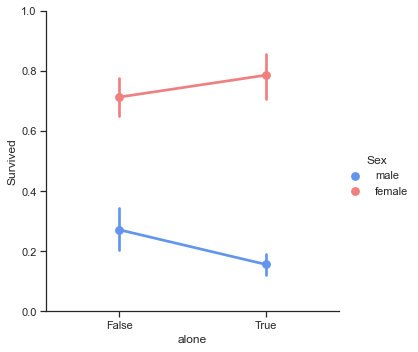

In [249]:
sns.factorplot("alone", "Survived", data=train_most_frequent, hue="Sex", palette=pal).set(ylim=(0, 1));

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


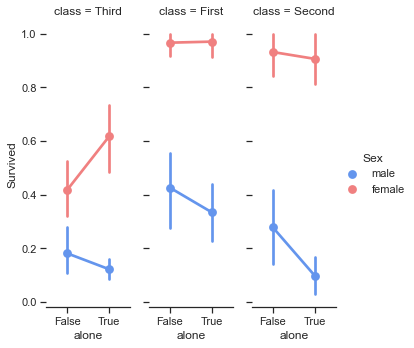

In [252]:
fg = sns.factorplot("alone", "Survived", data=train_most_frequent, hue="Sex",
                    col="class", palette=pal, aspect=.33)
fg.despine(left=True);

##### Author: Google y Alfredo Sabena